# Machine Learning Project : Census Income Data
Prediction task is to determine whether a person makes over 50K a year.

## Import Libraries 

In [73]:
#!pip install missingno
#!pip install eli5
#!pip install tensorflow
#!pip install keras

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import eli5
from eli5.sklearn import PermutationImportance
from tensorflow import keras
from keras.layers import Dense, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, roc_auc_score
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt.plots import plot_convergence,plot_objective, plot_evaluations
from xgboost import XGBClassifier
import six
from xgboost import plot_importance

In [76]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

## Train Data

In [77]:
train_data = pd.read_csv('Datasets/adult.data', header=None)
display(train_data.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [78]:
names = pd.read_csv('Datasets/adult.names', sep='|', header=None)
display(names.tail(20))

,0,1
87,NaN,similar weights. There is one important cave...
88,NaN,about this statement. That is that since the...
89,NaN,"actually a collection of 51 state samples, ea..."
90,NaN,"probability of selection, the statement only ..."
91,NaN,state.
92,">50K, <=50K.",NaN
93,age: continuous.,NaN
94,"workclass: Private, Self-emp-not-inc, Self-emp...",NaN
95,fnlwgt: continuous.,NaN
96,"education: Bachelors, Some-college, 11th, HS-g...",NaN


In [79]:
names = list(names.iloc[93:,0])
display(names)

['age: continuous.',
 'workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.',
 'fnlwgt: continuous.',
 'education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.',
 'education-num: continuous.',
 'marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.',
 'occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.',
 'relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.',
 'race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.',
 'sex: Female, Male.',
 'capital-gain: continuous.',
 'capital-loss: continuous.',
 'hours-per-week: continuous.',
 'nativ

In [80]:
new_names = [i.split(':')[0] for i in names]
display(new_names)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [81]:
new_names.append('salary')
display(new_names)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']

In [82]:
train_data.columns = new_names
display(train_data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
# Display the shape of the train data
display(train_data.shape)

(32561, 15)

In [84]:
# Display info of the train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [85]:
# Display summary statistics of continuous variables
display(train_data.describe())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [86]:
# Visualition des observations dupliquées uniques
train_data[train_data.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [87]:
train_data[(train_data.age == 90) & (train_data.fnlwgt == 52386)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
22220,90,Private,52386,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K


In [88]:
# Drop duplicates on train data
train_data.drop_duplicates(inplace=True)

In [89]:
train_data.shape

(32537, 15)

# Exploratory Data Analysis

## Data Visualization

### Target Variable Distribution

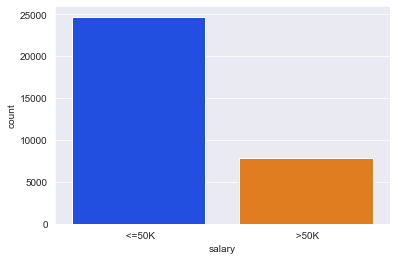

In [90]:
# Plot the distribution of the target variable 'salary'
sns.set_style(style='darkgrid')
sns.countplot(x='salary', data=train_data, palette='bright')
plt.show()

In [91]:
# Display the percentage that belongs to each class 
occ = train_data.salary.value_counts()
display((occ/train_data.shape[0])*100)

 <=50K    75.907428
 >50K     24.092572
Name: salary, dtype: float64

### Categorical Variables

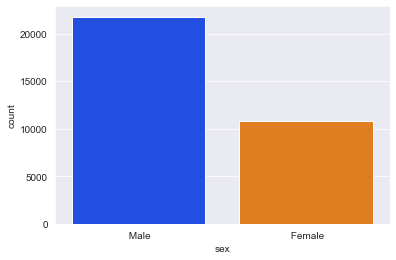

In [92]:
# Plot the distribution into the sex variable
sns.countplot(x='sex', data=train_data, palette='bright')
plt.show()

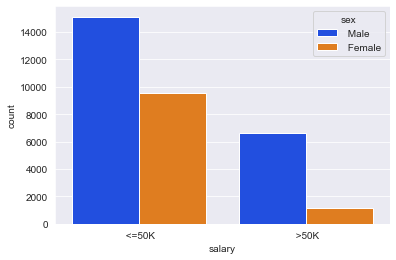

In [93]:
# Plot the salary according to the sex
sns.countplot(x='salary', hue='sex', data=train_data, palette='bright')
plt.show()

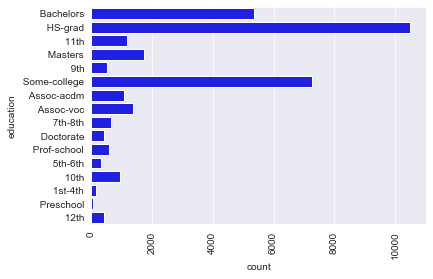

In [94]:
# Plot the distribution of the different levels of education
sns.countplot(y='education', data=train_data, color='blue')
plt.xticks(rotation=90)
plt.show()

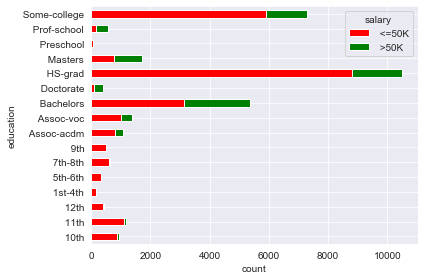

In [95]:
# Plot the salary according to the distribution of the different levels of education
pd.crosstab(train_data['education'], train_data['salary']).plot(kind='barh', stacked=True, color=['red', 'green'])
plt.xlabel('count')
plt.tight_layout()
#plt.show()
plt.savefig('education.svg') # bbox_inches='tight')#

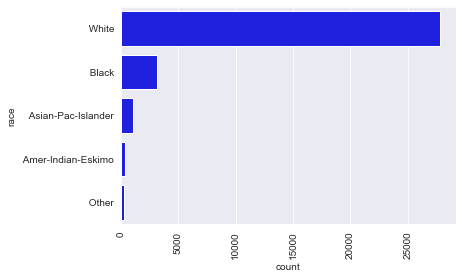

In [96]:
# Plot the differents races 
sns.countplot(y='race', data=train_data, color='blue')
plt.xticks(rotation=90)
plt.show()

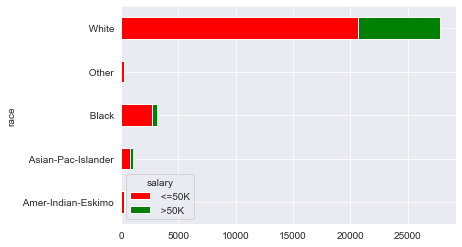

In [97]:
# Plot the salary according to the race
pd.crosstab(train_data['race'], train_data['salary']).plot(kind='barh', stacked=True, color=['red', 'green'])
plt.show()

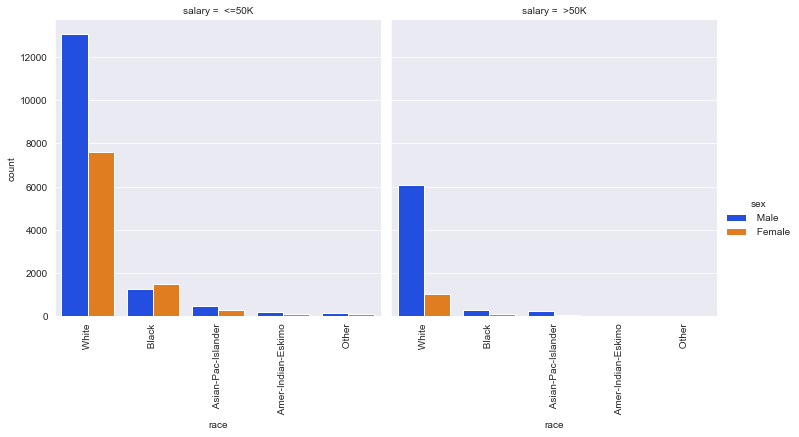

In [98]:
# Plot the salary according to the race and the sex
g = sns.catplot(x='race', hue='sex', col='salary', data=train_data, kind='count', palette='bright')
g.set_xticklabels(rotation=90)
plt.show()

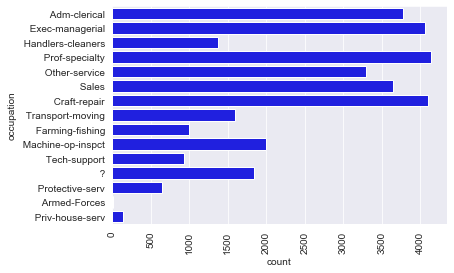

In [99]:
# Plot the distribution of the different types of occupation
sns.countplot(y='occupation', data=train_data, color='blue')
plt.xticks(rotation=90)
plt.show()

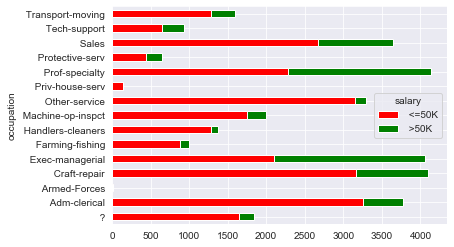

In [100]:
# Plot the salary according to the distribution of the different types of occupation
pd.crosstab(train_data['occupation'], train_data['salary']).plot(kind='barh', stacked=True, color=['red', 'green'])

plt.show()

### Continuous Variables

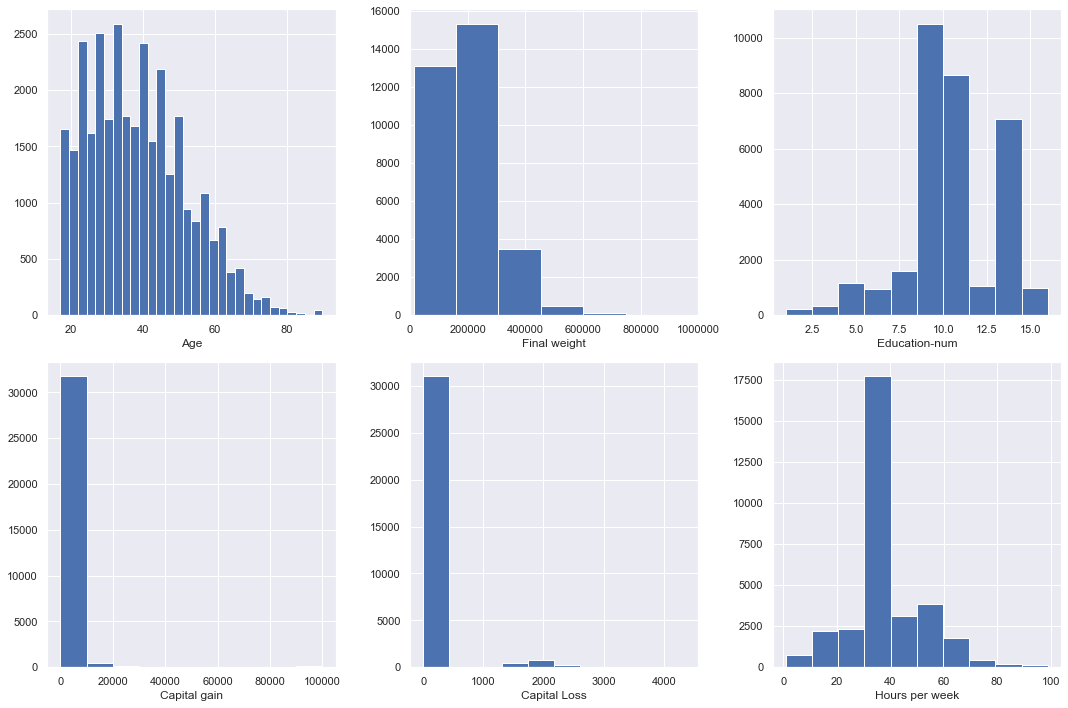

In [101]:
sns.set()
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.hist(train_data.age, bins=30)
plt.xlabel('Age')

plt.subplot(2,3,2)
plt.hist(train_data.fnlwgt)
plt.xlabel('Final weight')
plt.xlim([0, 1000000])

plt.subplot(2,3,3)
plt.hist(train_data['education-num'])
plt.xlabel('Education-num')

plt.subplot(2,3,4)
plt.hist(train_data['capital-gain'])
plt.xlabel('Capital gain')

plt.subplot(2,3,5)
plt.hist(train_data['capital-loss'])
plt.xlabel('Capital Loss')

plt.subplot(2,3,6)
plt.hist(train_data['hours-per-week'])
plt.xlabel('Hours per week')

plt.tight_layout()
plt.show()

### Correlation Matrix

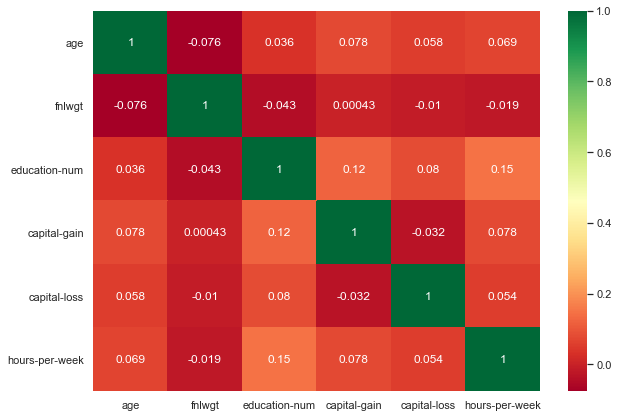

In [102]:
# Check if there is multicolinearity between continuous features
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')
plt.yticks(rotation='horizontal')
plt.show()

In [103]:
display(train_data.corr())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


## Missing Data

### Replacing missing values

In [104]:
# No NaN does not mean no missing values
display(train_data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [105]:
# Delete spaces before and after for variables containing strings
train_data = train_data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [106]:
# Display the rows with a question mark in our whole dataframe
display(train_data[train_data.values == '?'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K


In [107]:
# Replace missing values with np.isnan to be able to target rows after
train_data.replace('?', np.isnan, inplace=True)

In [108]:
# Is there a correlation between people who don't reveal their jobs and their salary ?
display(train_data[train_data.occupation == np.isnan].salary.value_counts())

<=50K    1652
>50K      191
Name: salary, dtype: int64

In [109]:
# Replace np.isnan by np.nan to deal with the missing values 
train_data.replace(np.isnan, np.nan, inplace=True)

In [110]:
# Display the missing values 
display(train_data.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
salary               0
dtype: int64

### Visualize missingness

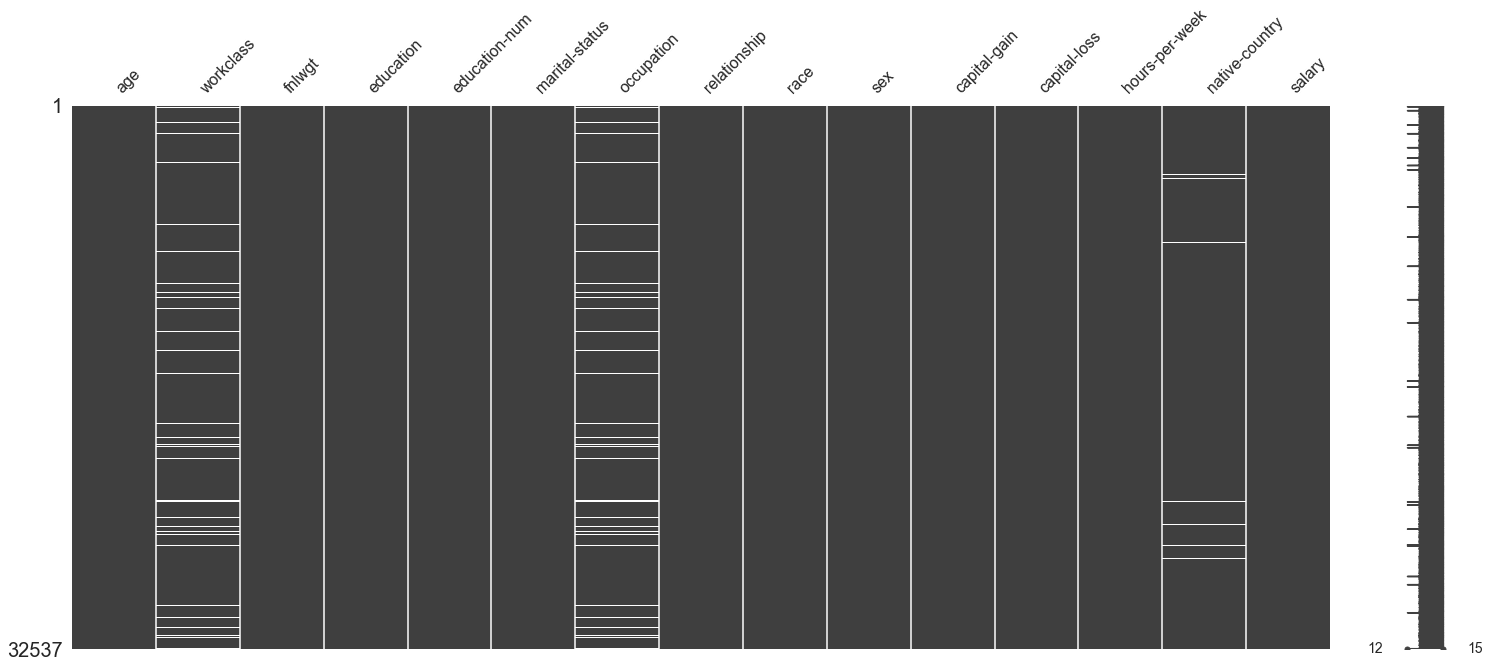

In [111]:
# Determine in which case of missing values are we : NMAR, MAR or MCAR
msno.matrix(train_data)
plt.show()

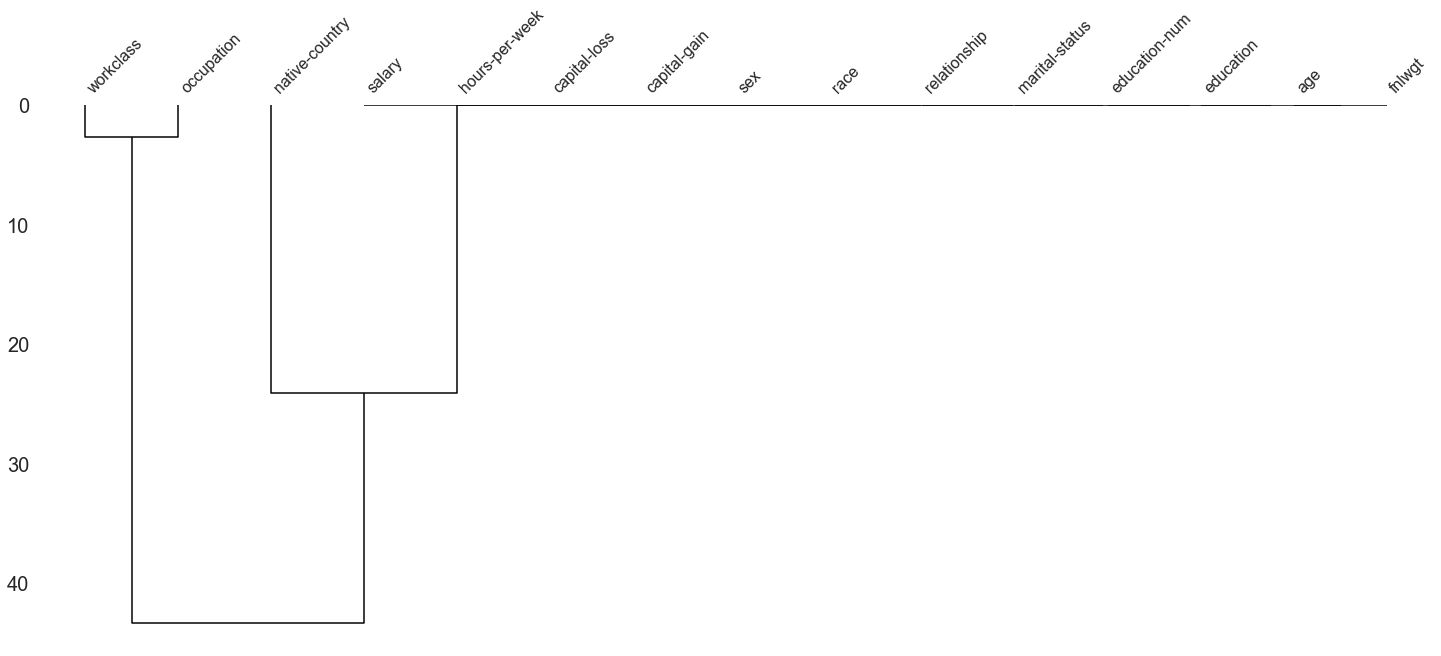

In [112]:
# Finding patterns in missing data
msno.dendrogram(train_data)
plt.show()

### Treating missing values

In [113]:
# Our missing values belongs to MNAR so we impute them by a new category called 'unknown'
train_data.fillna(value='unknown', inplace=True)

In [114]:
# Display missing values after treatement 
display(train_data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Transform categorical variables into dummies variables

In [115]:
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        print(f'{i} : {train_data[i].nunique()}')

workclass : 9
education : 16
marital-status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native-country : 42
salary : 2


In [116]:
# The idea is to split US and the others countries
train_data['native-country'].value_counts()

United-States                 29153
Mexico                          639
unknown                         582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [117]:
train_data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [118]:
def native_country_us(x):
    if x == 'United-States':
        return 1
    else:
        return 0

train_data['native-country_US'] = train_data['native-country'].apply(native_country_us)

In [119]:
def native_country_others(x):
    if x != 'United-States':
        return 1
    else:
        return 0
    
train_data['native-country_others'] = train_data['native-country'].apply(native_country_others)

In [120]:
train_data.drop('native-country', axis=1, inplace=True)

In [121]:
display(train_data.head()) 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary,native-country_US,native-country_others
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,0,1


In [122]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 16 columns):
age                      32537 non-null int64
workclass                32537 non-null object
fnlwgt                   32537 non-null int64
education                32537 non-null object
education-num            32537 non-null int64
marital-status           32537 non-null object
occupation               32537 non-null object
relationship             32537 non-null object
race                     32537 non-null object
sex                      32537 non-null object
capital-gain             32537 non-null int64
capital-loss             32537 non-null int64
hours-per-week           32537 non-null int64
salary                   32537 non-null object
native-country_US        32537 non-null int64
native-country_others    32537 non-null int64
dtypes: int64(8), object(8)
memory usage: 5.5+ MB


In [123]:
# Transform the target variable into a dummy variable with a dictionnary comprehension
mapping = {k:v for v,k in enumerate(train_data.salary.unique())}

train_data['salary'] = train_data.salary.map(mapping)

In [124]:
# Transform categorical variables into dummy variables
columns = [i for i in train_data.columns if train_data[i].dtype == 'object']

train_data = pd.get_dummies(train_data, columns = columns, drop_first=True)

In [125]:
display(train_data.head())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,native-country_US,native-country_others,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,2174,0,40,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [126]:
# Display the final shape of the train data before making predictions
display(train_data.shape)

(32537, 62)

# Supervised Learning

## Logistic Regression

### Benchmark model

In [55]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [56]:
lr = LogisticRegression(random_state=42)

lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
print(f'Train score is : {lr.score(X_train, y_train)}')
print(f'Test score is : {lr.score(X_test, y_test)}')

Train score is : 0.7976728869374314
Test score is : 0.7986068428600697


#### Confusion Matrix

In [58]:
# Predict on the test set and compute metrics
y_pred = lr.predict(X_test)
print(f'{confusion_matrix(y_test,y_pred)}\n')
print(classification_report(y_test,y_pred))

[[7166  244]
 [1722  630]]

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7410
           1       0.72      0.27      0.39      2352

    accuracy                           0.80      9762
   macro avg       0.76      0.62      0.63      9762
weighted avg       0.79      0.80      0.76      9762



#### ROC curve and AUC score

In [59]:
y_pred_prob = lr.predict_proba(X_test)[:,1]

In [60]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

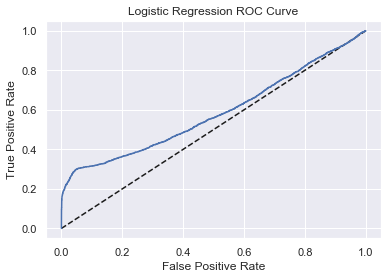

In [61]:
# Plotting the ROC curve
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [62]:
print(f'AUC score : {roc_auc_score(y_test, y_pred_prob)}')

AUC score : 0.5841630174336941


### Bayesian Optimisation

In [119]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [120]:
# Define hyperparameters 
c_space = Real(low=0, high=1, prior='uniform', name='c_space')
penalty = Categorical(('l1', 'l2'), name='penalty')

dimensions = [c_space, penalty]

nb_calls = 300

default_parameters = [0.5, 'l1'] 

In [121]:
@use_named_args(dimensions=dimensions)
def fitness(c_space, penalty):
    lr = LogisticRegression(solver=('liblinear'),C=c_space, penalty=penalty, random_state=42, n_jobs=-1)
    lr.fit(X_train, y_train)
    accurracy = lr.score(X_test, y_test)
    return -accurracy

[0.5649150951601082, 'l1']
-0.8563818889571809


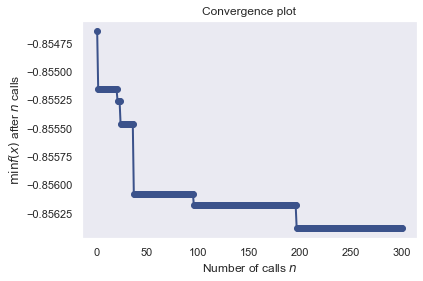

In [122]:
if __name__ == '__main__':
    search_result = gp_minimize(func=fitness,
                               dimensions=dimensions,
                               acq_func='EI',
                               n_calls=nb_calls,
                               x0=default_parameters,
                               random_state=42)
    
print(search_result.x)
print(search_result.fun)
plot = plot_convergence(search_result)

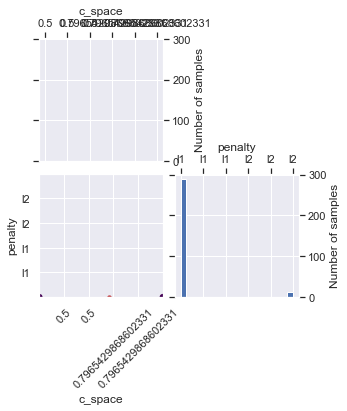

In [125]:
dimensions = ['c_space', 'penalty']
plot = plot_evaluations(search_result, dimensions=dimensions)

# C n'apporte rien et penalité l1 car coefficients éleveés dans notre jeu de données sans standardiser

In [73]:
#loc_iter.to_csv('results_lr.csv')

In [126]:
loc_iter = pd.read_csv('Poster/Modèle_lr/results_lr.csv')
display(loc_iter.head())

,nb_iter,c_space,penalty,accuracy
0,0,0.500000,l1,-0.854640
1,1,0.796543,l1,-0.855153
2,2,0.779691,l2,-0.798607
3,3,0.445833,l1,-0.854743
4,4,0.459249,l1,-0.854743


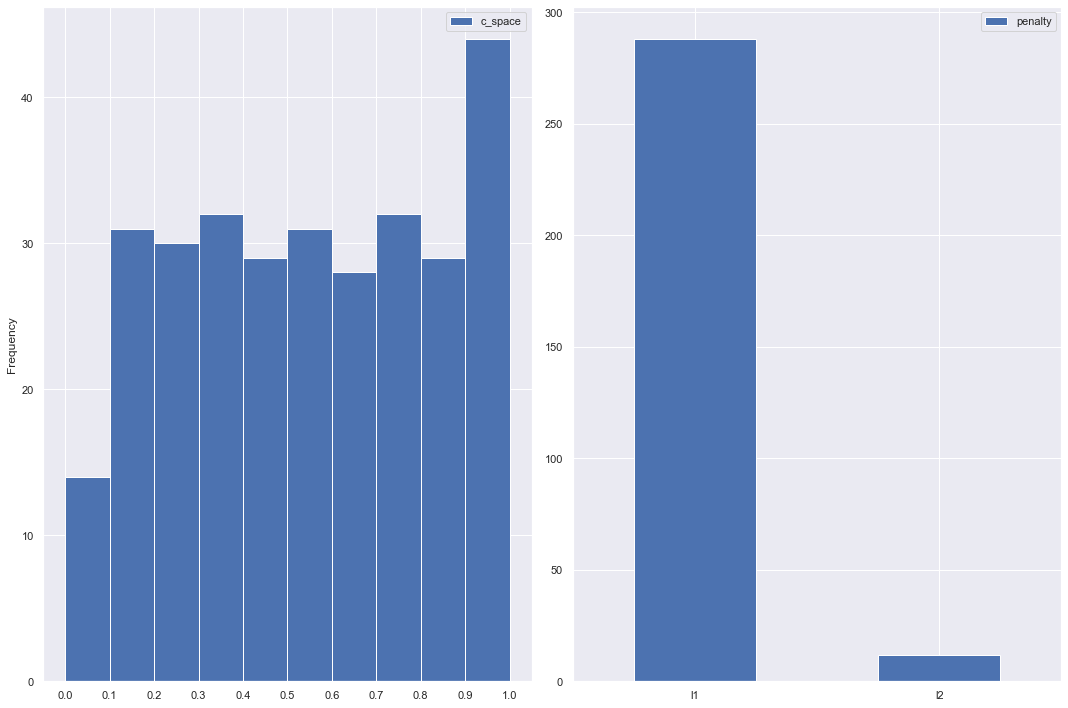

In [127]:
sns.set()
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
loc_iter.c_space.plot(kind='hist')
plt.legend()
plt.xticks(np.arange(0,1.1,0.1))

plt.subplot(1,2,2)
loc_iter.penalty.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

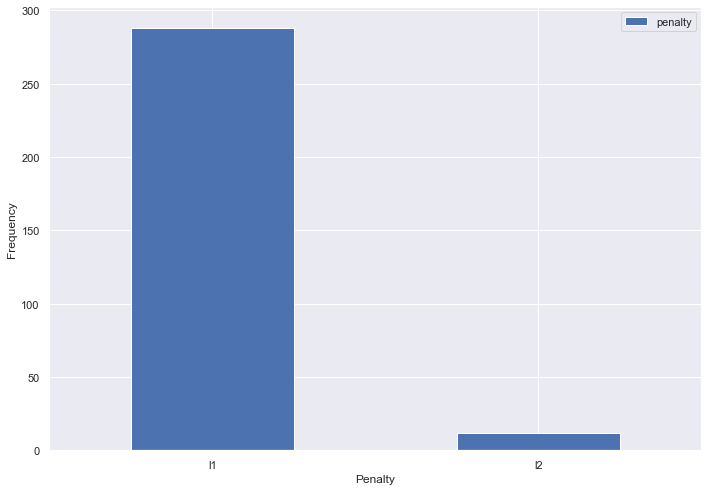

In [128]:
plt.figure(figsize=(10,7))
loc_iter.penalty.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.xlabel('Penalty')
plt.legend()
plt.tight_layout()
#plt.show()
plt.savefig('lr_penalty.svg')

In [129]:
lr_results = pd.DataFrame(search_result['func_vals'])

In [130]:
loc_iter = pd.concat([loc_iter, lr_results], axis=1)
loc_iter.rename(columns={0:'accuracy'}, inplace=True)
loc_iter.index.name='nb_iter'
display(loc_iter)

,nb_iter,c_space,penalty,accuracy,accuracy
nb_iter,,,,,
0,0,0.500000,l1,-0.854640,-0.854640
1,1,0.796543,l1,-0.855153,-0.855153
2,2,0.779691,l2,-0.798607,-0.798607
3,3,0.445833,l1,-0.854743,-0.854743
4,4,0.459249,l1,-0.854743,-0.854743
...,...,...,...,...,...
295,295,0.482224,l1,-0.854743,-0.854743
296,296,0.262791,l1,-0.855050,-0.855050
297,297,0.562503,l1,-0.856382,-0.856382


In [131]:
display(loc_iter.loc[125:135,:])

,nb_iter,c_space,penalty,accuracy,accuracy
nb_iter,,,,,
125,125,0.767971,l1,-0.855050,-0.855050
126,126,0.573511,l1,-0.855665,-0.855665
127,127,0.448232,l1,-0.854743,-0.854743
128,128,0.177634,l1,-0.854948,-0.854948
129,129,0.109611,l1,-0.855358,-0.855358
130,130,0.353192,l1,-0.855665,-0.855665
131,131,0.705555,l1,-0.855153,-0.855153
132,132,0.892125,l2,-0.798607,-0.798607
133,133,0.629477,l1,-0.855153,-0.855153


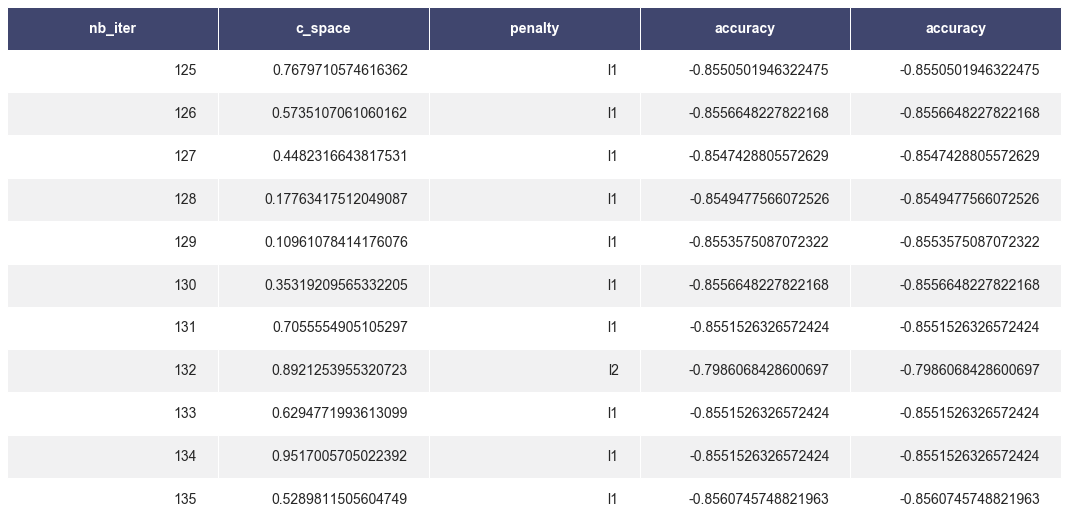

In [134]:
render_mpl_table(loc_iter.loc[125:135,:], header_columns=0, col_width=3)
plt.tight_layout()
plt.show()
#plt.savefig('keras_results.svg')

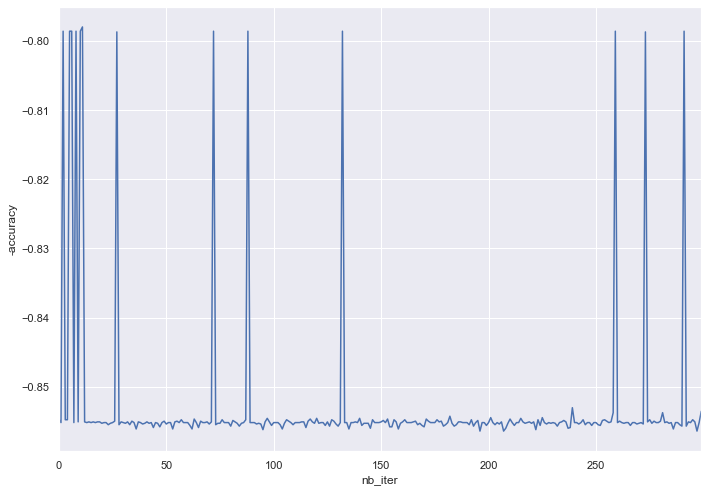

In [197]:
plt.figure(figsize=(10,7))
loc_iter.accuracy.plot(kind='line')
plt.ylabel('-accuracy')
plt.xlabel('nb_iter')
plt.tight_layout()
#plt.show()
plt.savefig('lr_skopt.svg')

### RandomizedSearchCV

In [82]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [83]:
# Create a Classifier
model = LogisticRegression(solver='liblinear')

# Define the parameters to try out
params = {'C':np.linspace(0,1), 'penalty': ['l1', 'l2']}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = 3, n_iter=20)

In [84]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={...
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0

In [85]:
random_search.best_params_

{'penalty': 'l1', 'C': 0.44897959183673464}

In [86]:
random_search.score(X_test, y_test)

0.856279450932186

## MLP Classifier

### Benchmark Model

In [87]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=42)

In [88]:
mlpclf = MLPClassifier(random_state=42)

mlpclf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [89]:
print(f'Train score is {mlpclf.score(X_train, y_train)}')
print(f'Test score is {mlpclf.score(X_test, y_test)}')

Train score is 0.9049396267837542
Test score is 0.8412210612579389


### Bayesian Optimisation

In [ ]:
y = train_data.salary
X = train_data.drop('salary',axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Define hyperparameters 
#hidden_layer_sizes = Integer(low=1, high=10, name='hidden_layer_sizes')
alpha = Real(low=0.00001, high=0.1, name='alpha')
solver = Categorical(('lbfgs', 'adam', 'lbfgs'), name='solver')
learning_rate = Categorical(('constant', 'invscaling', 'adaptive'), name='learning_rate')

dimensions = [alpha, solver, learning_rate]

nb_calls = 11

default_parameters = [0.0001, 'adam', 'constant'] 

In [ ]:
@use_named_args(dimensions=dimensions)
def fitness(alpha, solver, learning_rate):
    mlpclf = MLPClassifier(alpha=alpha, solver=solver, learning_rate=learning_rate, random_state=42)
    mlpclf.fit(X_train, y_train)
    accurracy = mlpclf.score(X_test, y_test)
    return -accurracy

In [ ]:
if __name__ == '__main__':
    search_result = gp_minimize(func=fitness,
                               dimensions=dimensions,
                               acq_func='EI',
                               n_calls=nb_calls,
                               x0=default_parameters,
                               random_state=42)
    
print(search_result.x)
print(search_result.fun)
plot = plot_convergence(search_result)

### MLP Classifier with RandomizedSearchCV

In [90]:
# Create a set of solutions for the number of hidden layers and neurons per hidden layers
nombre_layer = 4
liste_nombre=list(range(1, 10))

liste_finale=[]
for i in liste_nombre:
    for j in range(1,nombre_layer +1):
        liste_temp=[]
        for k in range(1,j+1):
            liste_temp.append(i)
        liste_finale.append(liste_temp) 

print(liste_finale)

[[1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [2], [2, 2], [2, 2, 2], [2, 2, 2, 2], [3], [3, 3], [3, 3, 3], [3, 3, 3, 3], [4], [4, 4], [4, 4, 4], [4, 4, 4, 4], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [6], [6, 6], [6, 6, 6], [6, 6, 6, 6], [7], [7, 7], [7, 7, 7], [7, 7, 7, 7], [8], [8, 8], [8, 8, 8], [8, 8, 8, 8], [9], [9, 9], [9, 9, 9], [9, 9, 9, 9]]


In [92]:
param_dist = {'hidden_layer_sizes': liste_finale , 
             'alpha': np.arange(0.001,0.101, 0.001),
             'solver':['lbfgs', 'adam', 'lbfgs'],
             'learning_rate':['constant', 'invscaling', 'adaptive']}

mlpclf = RandomizedSearchCV(MLPClassifier(random_state=1234),param_dist, cv=3, n_jobs=-1)
mlpclf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                                               [2, 2, 2, 2],
                                                               [3], [3, 3],
                          

In [93]:
# Print the tuned parameters and score
print(f'Tuned NN Parameters: {mlpclf.best_params_}')
print(f'Best score is {mlpclf.best_score_}')

Tuned NN Parameters: {'solver': 'lbfgs', 'learning_rate': 'invscaling', 'hidden_layer_sizes': [3, 3, 3], 'alpha': 0.069}
Best score is 0.8499670570083803


In [94]:
print(f'Train accuracy is {mlpclf.score(X_train, y_train)}')
print(f'Test accuracy is {mlpclf.score(X_test, y_test)}')

Train accuracy is 0.8551042810098792
Test accuracy is 0.8548453185822578


### Feature Importance

In [95]:
perm = PermutationImportance(mlpclf, random_state=1).fit(X_test, y_test)
display(eli5.show_weights(perm, feature_names = X.columns.tolist()))

Weight,Feature
0.0311 ± 0.0033,capital-gain
0.0232 ± 0.0026,marital-status_Married-civ-spouse
0.0132 ± 0.0039,education-num
0.0117 ± 0.0031,age
0.0077 ± 0.0040,hours-per-week
0.0068 ± 0.0018,workclass_Self-emp-not-inc
0.0063 ± 0.0014,relationship_Wife
0.0054 ± 0.0026,workclass_Private
0.0045 ± 0.0021,occupation_Prof-specialty
0.0042 ± 0.0010,occupation_unknown


## Keras

### Benchmark Model

In [55]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=42)

In [56]:
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(4, activation='relu', input_shape=(X_scaled.shape[1],)))

#model.add(BatchNormalization())

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
#early_stopping_monitor = EarlyStopping(monitor='val_accuracy', patience=4)

# https://machinelearningmastery.com/check-point-deep-learning-models-keras/
# Save the best model as best_model.hdf5
# modelCheckpoint = ModelCheckpoint('best_model.hdf5', save_best_only = True)

# Fit the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=False) #, callbacks=[early_stopping_monitor])

In [77]:
# Evaluate your model's accuracy on the test data
print(model.evaluate(X_test, y_test)[1])

9762/9762 [==============================] - 0s 12us/step
0.856586754322052


In [115]:
#print('Train Accuracy: %.4f' % hist.history['accuracy'][-1])
#print('Test Accuracy: %.4f' % hist.history['val_accuracy'][-1])

In [117]:
# We have to add the weights and bias to determine the total number of param per layer
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 248       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


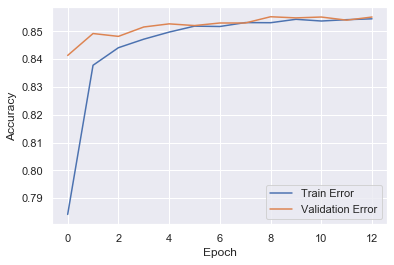

In [118]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Validation Error')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
plot_history(hist)

# This graph doesn't show overfitting but convergence. 
# It looks like your model has learned all it could from the data and it no longer improves.

In [ ]:
# Allow us to visualize the NN
#!pip install ann_visualizer

#from ann_visualizer.visualize import ann_viz

#ann_viz(model, title="My first neural network")

### Bayesian Optimisation

https://medium.com/@crawftv/parameter-hyperparameter-tuning-with-bayesian-optimization-7acf42d348e1

In [96]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
dim_learning_rate = Real(low=1e-5, high=1e-1, prior='uniform', name='learning_rate')
dim_num_dense_layers = Integer(low=1, high=15, name='num_dense_layers')
dim_num_input_nodes = Integer(low=1, high=50, name='num_input_nodes')
dim_num_dense_nodes = Integer(low=1, high=50, name='num_dense_nodes')
dim_activation = Categorical(categories=['relu', 'sigmoid', 'tanh'], name='activation')
dim_batch_size = Integer(low=1, high=500, name='batch_size')

dimensions = [dim_learning_rate,
              dim_num_dense_layers,
              dim_num_input_nodes,
              dim_num_dense_nodes,
              dim_activation,
              dim_batch_size]

default_parameters = [1e-3, 5,25, 25, 'relu',250]

In [98]:
input_shape = (X_scaled.shape[1],)

In [99]:
def create_model(learning_rate, num_dense_layers,num_input_nodes,
                 num_dense_nodes, activation):
    #start the model making process and create our first layer
    model = Sequential()
    model.add(Dense(num_input_nodes, input_shape= input_shape, activation=activation
                   ))
    #create a loop making a new dense layer for the amount passed to this model.
    #naming the layers helps avoid tensorflow error deep in the stack trace.
    for i in range(num_dense_layers):
        name = 'layer_dense_{0}'.format(i+1)
        model.add(Dense(num_dense_nodes,
                 activation=activation,
                        name=name
                 ))
    #add our classification layer.
    model.add(Dense(1,activation='sigmoid'))
    
    #setup our optimizer and compile
    adam = keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=adam, loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [100]:
@use_named_args(dimensions=dimensions)
def fitness(learning_rate, num_dense_layers, num_input_nodes, 
            num_dense_nodes,activation, batch_size):

    model = create_model(learning_rate=learning_rate,
                         num_dense_layers=num_dense_layers,
                         num_input_nodes=num_input_nodes,
                         num_dense_nodes=num_dense_nodes,
                         activation=activation)
    

    #named blackbox because it represents the structure
    blackbox = model.fit(x=X_scaled,
                        y=y,
                        epochs=3,
                        batch_size=batch_size,
                        validation_split=0.3,
                        verbose=False)
    #return the validation accuracy for the last epoch.
    accuracy = blackbox.history['val_accuracy'][-1]

    # Print the classification accuracy.
    #print()
    #print("Accuracy: {0:.2%}".format(accuracy))
    #print()


    # Delete the Keras model with these hyper-parameters from memory.
    del model
    
    # Clear the Keras session, otherwise it will keep adding new
    # models to the same TensorFlow graph each time we create
    # a model with a different set of hyper-parameters.
    #K.clear_session()
    #tensorflow.reset_default_graph()
    
    # the optimizer aims for the lowest score, so we return our negative accuracy
    return -accuracy

[0.08068882026399428, 2, 33, 45, 'sigmoid', 500]
-0.8559721112251282


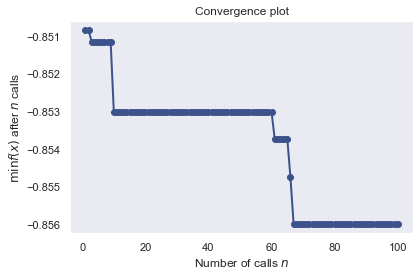

In [101]:
if __name__ == '__main__':
    search_result = gp_minimize(func=fitness,
                               dimensions=dimensions,
                               acq_func='EI',
                               n_calls=100,
                               x0=default_parameters,
                               random_state=42,
                               n_jobs=-1)
    
print(search_result.x)
print(search_result.fun)
plot = plot_convergence(search_result)
plt.tight_layout()
plt.savefig('keras_results.svg')

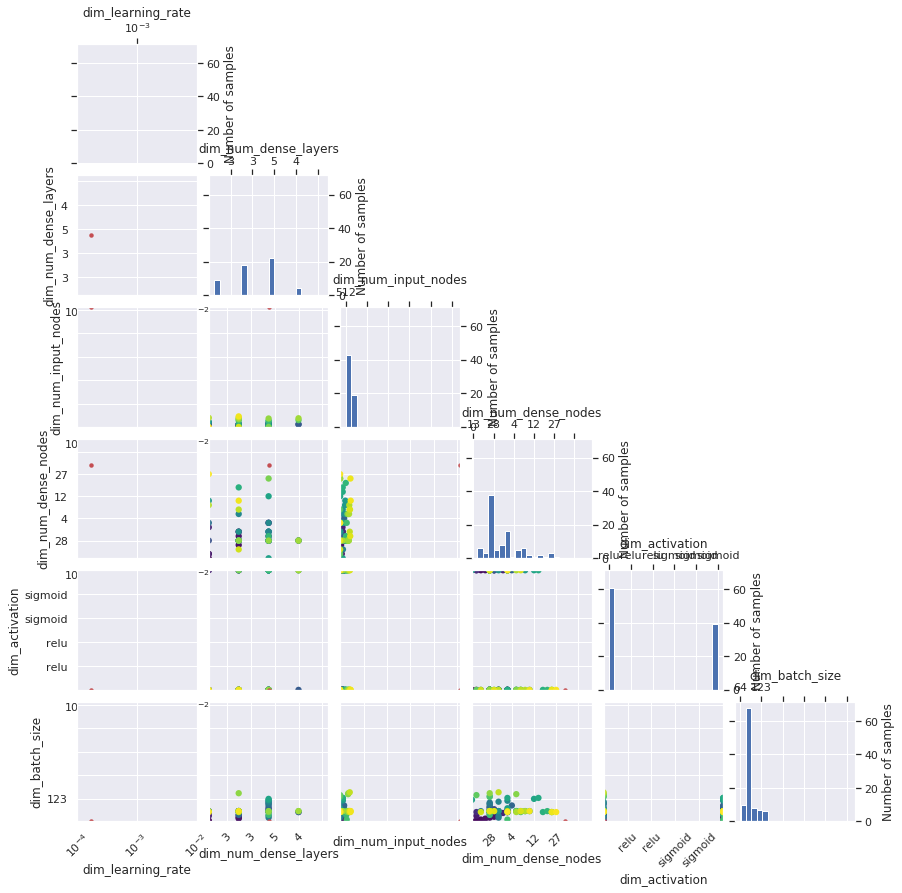

In [95]:
dimensions = ['dim_learning_rate',
              'dim_num_dense_layers',
              'dim_num_input_nodes',
              'dim_num_dense_nodes',
              'dim_activation',
              'dim_batch_size']
plot = plot_evaluations(search_result, dimensions=dimensions)

In [96]:
loc_iter = pd.DataFrame(search_result.x_iters, columns=dimensions)
display(loc_iter.head())

,dim_learning_rate,dim_num_dense_layers,dim_num_input_nodes,dim_num_dense_nodes,dim_activation,dim_batch_size
0,0.001000,1,512,13,relu,64
1,0.003918,2,399,17,relu,14
2,0.000829,2,74,19,relu,93
3,0.007535,1,508,18,sigmoid,2
4,0.000111,3,205,2,sigmoid,31


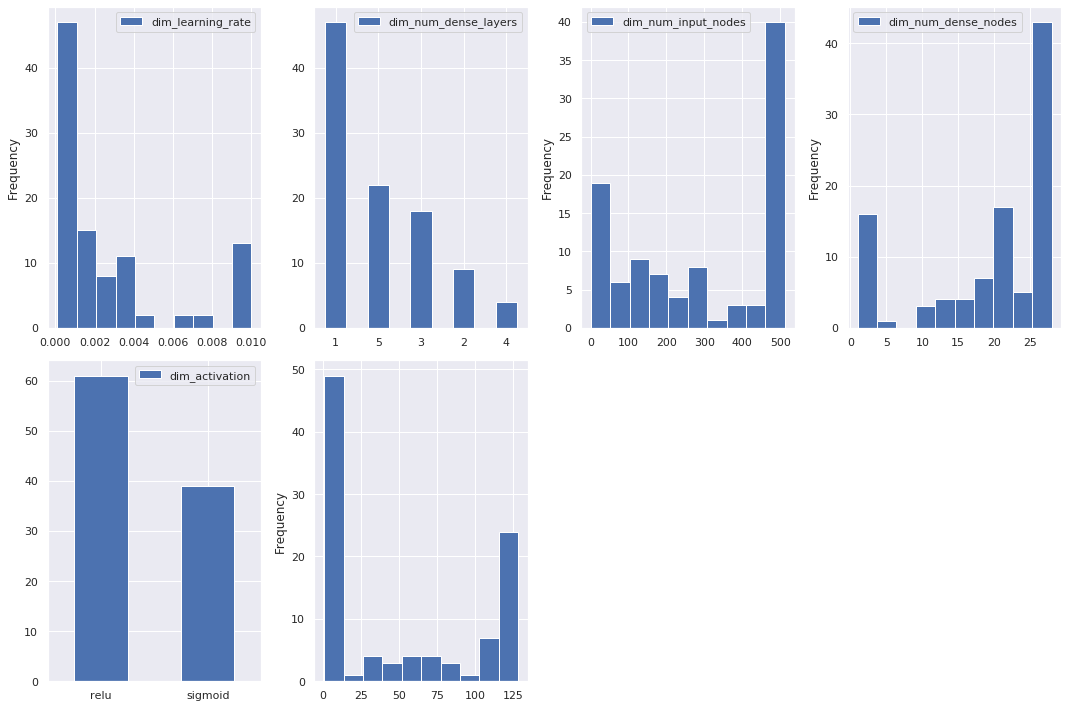

In [98]:
sns.set()
plt.figure(figsize=(15,10))

plt.subplot(2,4,1)
loc_iter.dim_learning_rate.plot(kind='hist')
plt.legend()

plt.subplot(2,4,2)
loc_iter.dim_num_dense_layers.value_counts().plot(kind='bar')
plt.legend()
plt.xticks(rotation=0)

plt.subplot(2,4,3)
loc_iter.dim_num_input_nodes.plot(kind='hist')
plt.legend()

plt.subplot(2,4,4)
loc_iter.dim_num_dense_nodes.plot(kind='hist')
plt.legend()

plt.subplot(2,4,5)
loc_iter.dim_activation.value_counts().plot(kind='bar')
plt.legend()
plt.xticks(rotation=0)

plt.subplot(2,4,6)
loc_iter.dim_batch_size.plot(kind='hist')

plt.tight_layout()
plt.show()
#plt.savefig('keras_skopt.png')

### Keras with RandomizedsearchCV

In [57]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=42)

In [63]:
# Creates a model given an activation and learning rate
def keras_model(learning_rate=0.01, activation='relu'):
    # Create an Adam optimizer with the given learning rate
    opt = keras.optimizers.Adam(lr=learning_rate)
    
    # Create your binary classification model
    model = Sequential()
    model.add(Dense(4, activation=activation, input_shape=(X_scaled.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create a Keras Classifier
model = KerasClassifier(build_fn = keras_model, verbose=False)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [32, 128, 256], 
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = 3)

In [64]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x1a403acc90>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'batch_size': [32, 128, 256],
                                        'epochs': [50, 100, 200],
                                        'learning_rate': [0.1, 0.01, 0.001]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [105]:
print(random_search.best_score_, random_search.best_params_)

0.8507133523623148 {'learning_rate': 0.1, 'epochs': 50, 'batch_size': 32, 'activation': 'relu'}


In [106]:
random_search.score(X_test, y_test)

9762/9762 [==============================] - 0s 21us/step


0.8395820260047913

## Xgboost

### Benchmark Model

In [50]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [51]:
xgb = XGBClassifier(random_state=42)

xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
print(f'Train score is : {xgb.score(X_train, y_train)}')
print(f'Test score is : {xgb.score(X_test, y_test)}')

Train score is : 0.8681116181116181
Test score is : 0.8662094380182209


### Bayesian Optimisation

In [78]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [79]:
# Define hyperparameters 

learning_rate = Real(low=0.001, high=0.5, prior='uniform', name='learning_rate')
gamma = Real(low = 0, high = 0.009, prior='uniform', name='gamma')
n_estimators = Integer(low=50, high = 3000,name='n_estimators')
max_depth = Integer(low=3, high=8, name='max_depth')
subsample = Real(low = 0.5, high=1,name='subsample')
colsample_bytree = Real(low=0.5, high=1, name='colsample_bytree')
reg_alpha = Real(low=0, high=3,name='reg_alpha')
reg_lambda = Real(low=0, high=3,name='reg_lambda')
             
dimensions = [learning_rate, gamma,n_estimators,max_depth,subsample,colsample_bytree,reg_alpha, reg_lambda]

nb_calls = 300

default_parameters = [0.23,0.0068,95,6,0.99,0.5,0.96, 1.5] 

In [80]:
@use_named_args(dimensions=dimensions)
def fitness(learning_rate,gamma,n_estimators,max_depth,subsample,colsample_bytree,reg_alpha):
    xg_opt = XGBClassifier(learning_rate=learning_rate,
                               gamma=gamma,
                               n_estimators=n_estimators,
                               max_depth=max_depth,
                               subsample=subsample,
                               colsample_bytree=colsample_bytree,
                               reg_alpha=reg_alpha,
                               reg_lambda=reg_lambda,
                               n_jobs=-1,
                               nthread=48,
                               random_state=42)
    xg_opt.fit(X_train, y_train)
    accurracy = xg_opt.score(X_test, y_test)
    return -accurracy

[0.1490415256731458, 0.003835236318267961, 147, 5, 0.5019201209244669, 0.5193280812951384, 2.667470523727819]
-0.8745009724639164


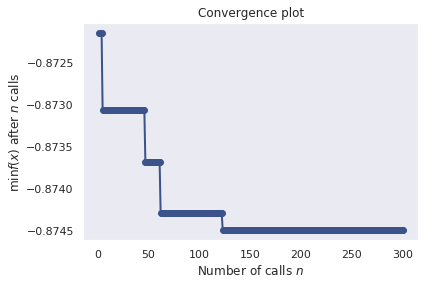

In [81]:
if __name__ == '__main__':
    search_result = gp_minimize(func=fitness,
                               dimensions=dimensions,
                               acq_func='EI',
                               n_calls=nb_calls,
                               x0=default_parameters,
                               random_state=42)
    
print(search_result.x)
print(search_result.fun)
plot = plot_convergence(search_result)

In [82]:
dimensions1 = dimensions = ['learning_rate', 'gamma', 'n_estimators', 'max_depth',
                            'subsample', 'colsample_bytree', 'reg_alpha', 'reg_lambda']

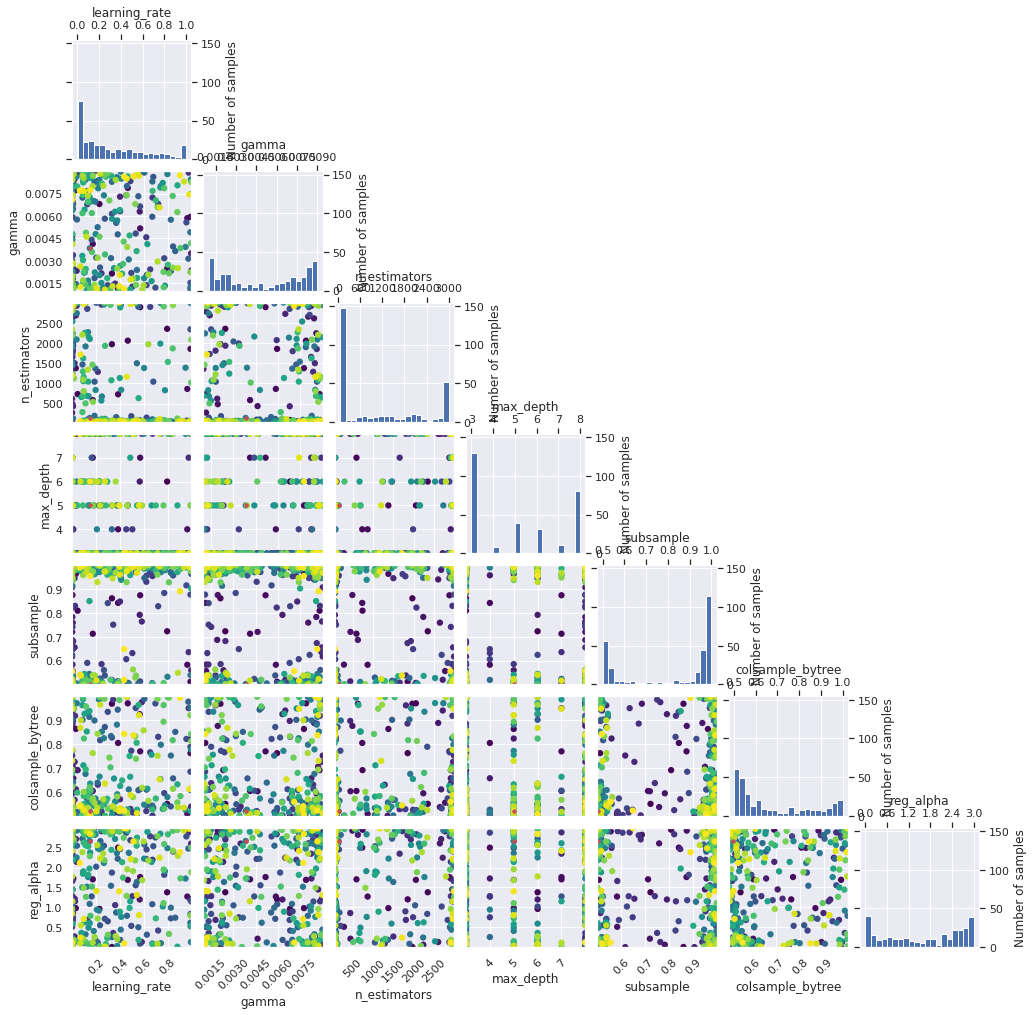

In [83]:
plot1 = plot_evaluations(search_result, dimensions=dimensions1)

In [84]:
loc_iter = pd.DataFrame(search_result.x_iters, columns=dimensions)
display(loc_iter.head())

,learning_rate,gamma,n_estimators,max_depth,subsample,colsample_bytree,reg_alpha
0,0.230000,0.006800,95,6,0.990000,0.500000,0.960000
1,0.796746,0.002467,2350,6,0.722916,0.549987,1.377747
2,0.334375,0.002143,1970,3,0.860999,0.969276,0.002336
3,0.992219,0.005940,1854,3,0.511531,0.762387,1.199583
4,0.047619,0.008790,737,3,0.809193,0.691231,2.949693


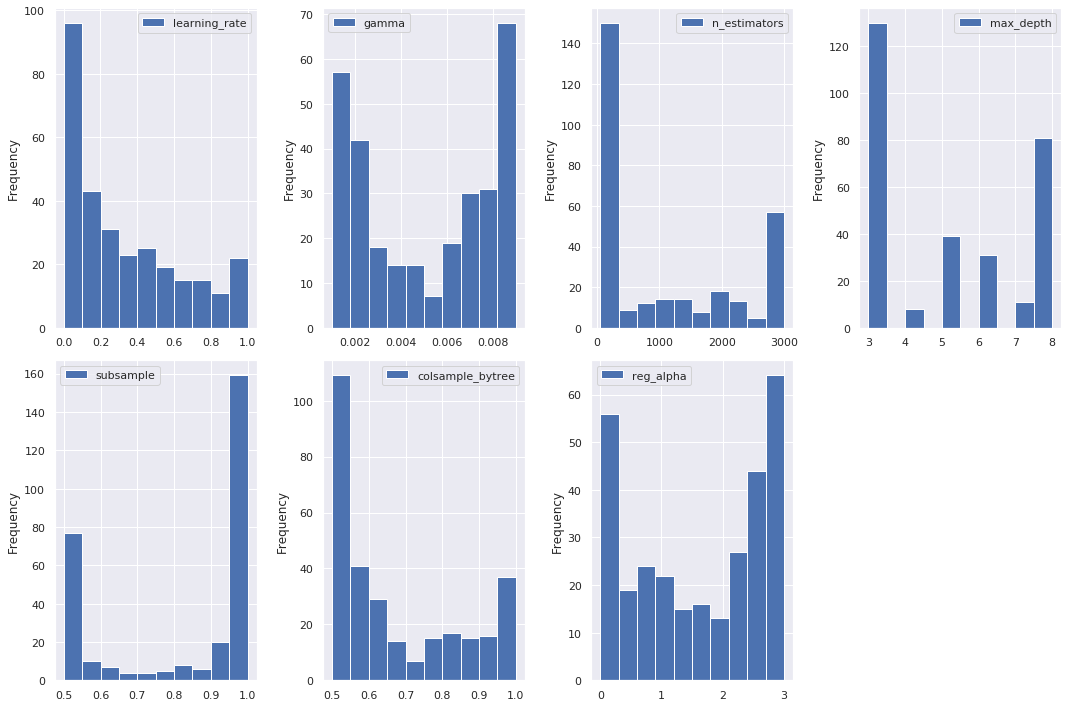

In [88]:
sns.set()
plt.figure(figsize=(15,10))

plt.subplot(2,4,1)
loc_iter.learning_rate.plot(kind='hist')
plt.legend()

plt.subplot(2,4,2)
loc_iter.gamma.plot(kind='hist')
plt.legend()

plt.subplot(2,4,3)
loc_iter.n_estimators.plot(kind='hist')
plt.legend()

plt.subplot(2,4,4)
loc_iter.max_depth.plot(kind='hist')
plt.legend()

plt.subplot(2,4,5)
loc_iter.subsample.plot(kind='hist')
plt.legend()

plt.subplot(2,4,6)
loc_iter.colsample_bytree.plot(kind='hist')
plt.legend()

plt.subplot(2,4,7)
loc_iter.reg_alpha.plot(kind='hist')
plt.legend()

plt.subplot(2,4,8)
loc_iter.reg_lambda.plot(kind='hist')
plt.legend()

plt.tight_layout()
plt.show()
#plt.savefig('xgboost_skopt.png') #pdf ou svg

# Test Data

In [127]:
test_data = pd.read_csv('Datasets/adult.test')
display(test_data.head())

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [128]:
test_data.reset_index(inplace=True)

In [129]:
test_data.columns = ['age','workclass','fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','salary']

In [130]:
display(test_data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [131]:
# Display the shape of the test data
display(test_data.shape)

(16281, 15)

In [132]:
# Display info of the test data
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
salary            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


None

In [133]:
# Display summary statistics of continuous variables
display(test_data.describe())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [134]:
# Duplicates rows for test data
test_data[test_data.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K.
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K.
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K.
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.


In [135]:
# Drop duplicates on test data
test_data.drop_duplicates(inplace=True)

## Missing Data

### Replacing missing values

In [136]:
# No NaN does not mean no missing values
display(test_data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [137]:
# Delete spaces before and after for variables containing strings
test_data = test_data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [138]:
# Display the rows with a question mark in our whole dataframe
display(test_data[test_data.values == '?'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K.
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K.
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K.
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K.
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K.
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K.


In [139]:
# Replace missing values with np.isnan to be able to target rows after
test_data.replace('?', np.isnan, inplace=True)

In [140]:
# Is there a correlation between people who don't reveal their jobs and their salary ?
display(test_data[test_data.occupation == np.isnan].salary.value_counts())

<=50K.    892
>50K.      74
Name: salary, dtype: int64

In [141]:
# Replace np.isnan by np.nan to deal with the missing values 
test_data.replace(np.isnan, np.nan, inplace=True)

In [142]:
# Display the missing values 
display(test_data.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
salary              0
dtype: int64

### Visualize missingness

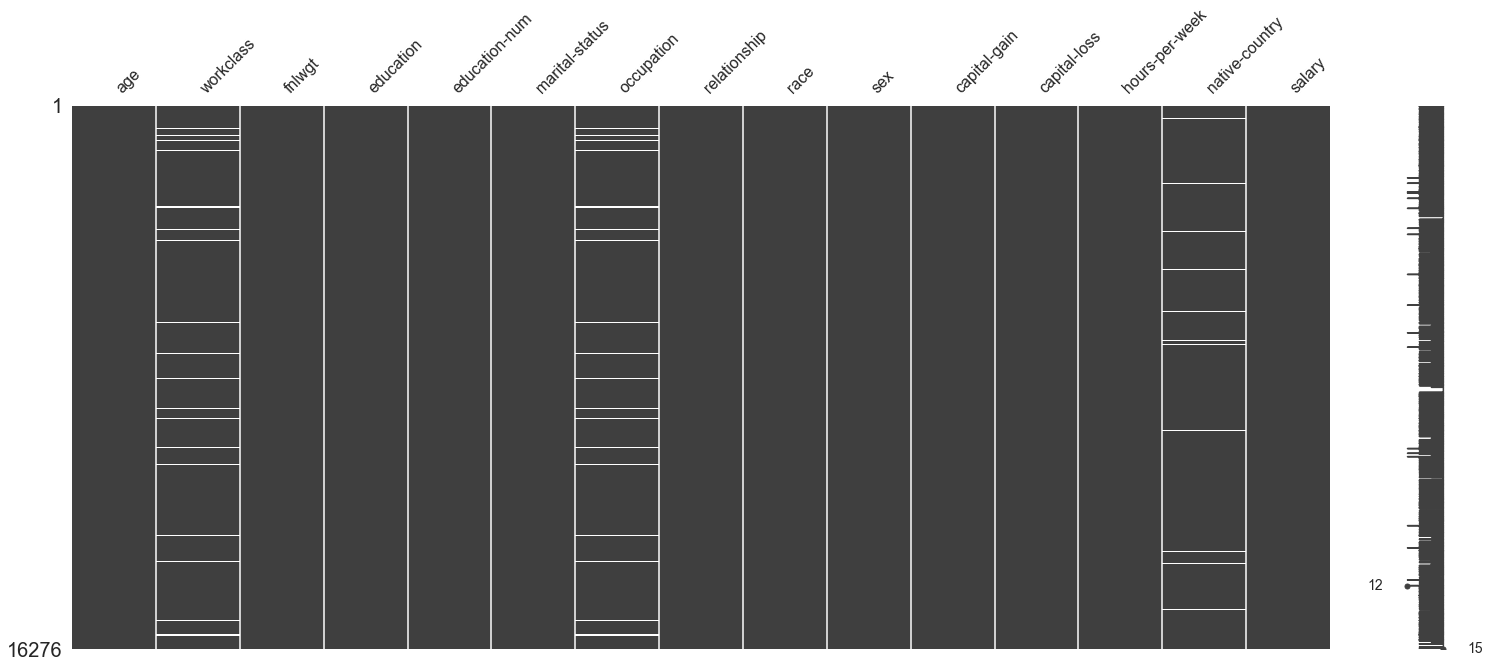

In [143]:
# Determine in which case of missing values are we : NMAR, MAR or MCAR
msno.matrix(test_data)
plt.show()

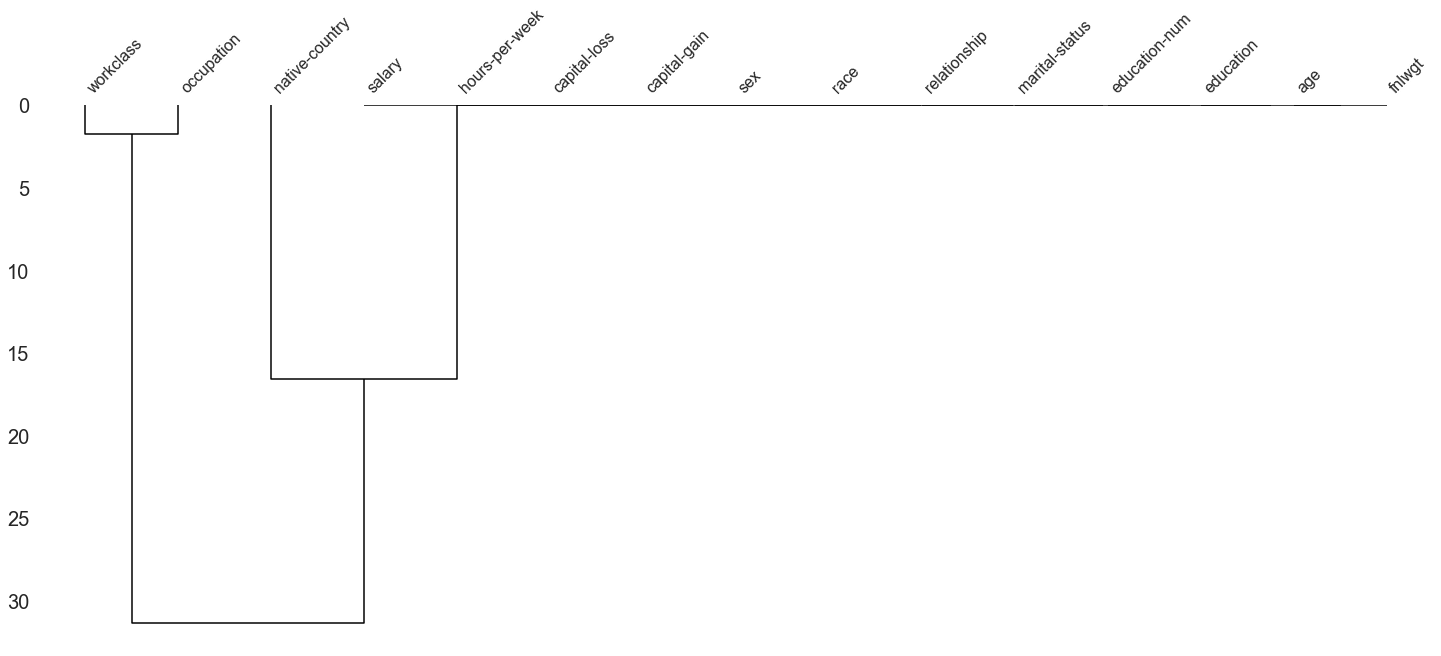

In [144]:
# Finding patterns in missing data
msno.dendrogram(test_data)
plt.show()

### Treating missing values

In [145]:
# Our missing values belongs to MNAR so we impute them by a new category called 'unknown'
test_data.fillna(value='unknown', inplace=True)

In [146]:
# Display missing values after treatement 
display(test_data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Transform categorical variables into dummies variables

In [147]:
for i in test_data.columns:
    if test_data[i].dtype == 'object':
        print(f'{i} : {test_data[i].nunique()}')

workclass : 9
education : 16
marital-status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native-country : 41
salary : 2


In [148]:
# The idea is to split US and the others countries
test_data['native-country'].value_counts()

United-States                 14657
Mexico                          308
unknown                         274
Philippines                      97
Puerto-Rico                      70
Germany                          69
Canada                           61
India                            51
El-Salvador                      49
China                            47
Cuba                             43
England                          37
South                            35
Dominican-Republic               33
Italy                            32
Haiti                            31
Japan                            30
Portugal                         30
Poland                           27
Columbia                         26
Jamaica                          25
Guatemala                        24
Greece                           20
Vietnam                          19
Ecuador                          17
Iran                             16
Nicaragua                        15
Peru                        

In [149]:
test_data['native-country'].unique()

array(['United-States', 'unknown', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France'],
      dtype=object)

In [150]:
def native_country_us(x):
    if x == 'United-States':
        return 1
    else:
        return 0

test_data['native-country_US'] = test_data['native-country'].apply(native_country_us)

In [151]:
def native_country_others(x):
    if x != 'United-States':
        return 1
    else:
        return 0
    
test_data['native-country_others'] = test_data['native-country'].apply(native_country_others)

In [152]:
test_data.drop('native-country', axis=1, inplace=True)

In [153]:
display(test_data.head()) 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary,native-country_US,native-country_others
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K.,1,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K.,1,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K.,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K.,1,0
4,18,unknown,103497,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,<=50K.,1,0


In [154]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16276 entries, 0 to 16280
Data columns (total 16 columns):
age                      16276 non-null int64
workclass                16276 non-null object
fnlwgt                   16276 non-null int64
education                16276 non-null object
education-num            16276 non-null int64
marital-status           16276 non-null object
occupation               16276 non-null object
relationship             16276 non-null object
race                     16276 non-null object
sex                      16276 non-null object
capital-gain             16276 non-null int64
capital-loss             16276 non-null int64
hours-per-week           16276 non-null int64
salary                   16276 non-null object
native-country_US        16276 non-null int64
native-country_others    16276 non-null int64
dtypes: int64(8), object(8)
memory usage: 2.1+ MB


In [155]:
# Transform the target variable into a dummy variable with a dictionnary comprehension
mapping = {k:v for v,k in enumerate(test_data.salary.unique())}

test_data['salary'] = test_data.salary.map(mapping)

In [156]:
# Transform categorical variables into dummy variables
columns = [i for i in test_data.columns if test_data[i].dtype == 'object']

test_data = pd.get_dummies(test_data, columns = columns, drop_first=True)

In [157]:
display(test_data.head())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,native-country_US,native-country_others,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,226802,7,0,0,40,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,28,336951,12,0,0,40,1,1,0,1,...,0,0,0,0,0,0,0,0,1,1
3,44,160323,10,7688,0,40,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,10,0,0,30,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [158]:
# Display the final shape of the test data before making predictions
display(test_data.shape)

(16276, 62)

## Final models performance evaluation

### Logistic regression

#### Accuracy score

In [159]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

In [162]:
# Fit all the data with the best hyper parameters found with the test set
lr_final = LogisticRegression(C=0.2121020164221312, penalty= 'none', random_state=42)

lr_final.fit(X,y)

LogisticRegression(C=0.2121020164221312, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [120]:
y_test_data = test_data.salary
X_test_data = test_data.drop('salary', axis=1)

In [121]:
print(f'Accuracy score on the test set is : {lr_final.score(X_test_data, y_test_data)}')

Accuracy score on the test set is : 0.8538338658146964


#### Confusion matrix

In [94]:
# Predict on the test set and compute metrics
y_pred = lr_final.predict(X_test_data)
print(f'{confusion_matrix(y_test_data,y_pred)}\n')
print(classification_report(y_test_data,y_pred))

[[11625   810]
 [ 1569  2277]]

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.74      0.59      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



#### ROC curve and AUC score

In [95]:
y_pred_prob = lr_final.predict_proba(X_test_data)[:,1]

In [96]:
fpr,tpr,thresholds = roc_curve(y_test_data,y_pred_prob)

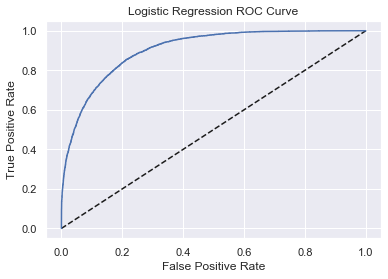

In [97]:
# Plotting the ROC curve
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [98]:
print(f'AUC score on the test set is : {roc_auc_score(y_test_data, y_pred_prob)}')

AUC score on the test set is : 0.90423076754192


### Keras

#### Accuracy score

In [65]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(11, activation='sigmoid', input_shape=(X_scaled.shape[1],)))

#model.add(BatchNormalization())

# Add the output layer
model.add(Dense(14, activation='sigmoid'))

model.add(Dense(14, activation='sigmoid'))

model.add(Dense(14, activation='sigmoid'))

model.add(Dense(14, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=0.027750)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
#early_stopping_monitor = EarlyStopping(monitor='val_accuracy', patience=4)

# Fit the model
hist = model.fit(X_scaled,y, batch_size=338,  epochs=100, verbose=False)

In [537]:
y_test_data = test_data.salary
X_test_data = test_data.drop('salary', axis=1)

scaler = StandardScaler()
X_test_data_scaled = scaler.fit_transform(X_test_data)

In [538]:
print(f'\nAccuracy score on the test set is : {model.evaluate(X_test_data_scaled,y_test_data)[1]}')

16276/16276 [==============================] - 0s 21us/step

Accuracy score on the test set is : 0.8545711636543274


### Xgboost

#### Accuracy score

In [164]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

In [165]:
xgb_test = XGBClassifier(learning_rate=0.007488004043342602,
                               gamma=0.0075659608090417945,
                               n_estimators=2892,
                               max_depth=6,
                               subsample=0.983151906882727,
                               colsample_bytree=0.5181433325086907,
                               reg_alpha=0.6970874066822441,
                                reg_lambda=2.4816443442269236,
                               n_jobs=-1,
                               random_state=4)

xgb_test.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5181433325086907,
              gamma=0.0075659608090417945, learning_rate=0.007488004043342602,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              n_estimators=2892, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=4,
              reg_alpha=0.6970874066822441, reg_lambda=2.4816443442269236,
              scale_pos_weight=1, seed=None, silent=None,
              subsample=0.983151906882727, verbosity=1)

In [128]:
y_test_data = test_data.salary
X_test_data = test_data.drop('salary', axis=1)

In [129]:
print(f'Accuracy score on the test set is : {xgb_test.score(X_test_data, y_test_data)}')

Accuracy score on the test set is : 0.8744163185057754


#### Confusion matrix

In [106]:
# Predict on the test set and compute metrics
y_pred = xgb_final.predict(X_test_data)
print(f'{confusion_matrix(y_test_data,y_pred)}\n')
print(classification_report(y_test_data,y_pred))

[[11702   733]
 [ 1348  2498]]

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12435
           1       0.77      0.65      0.71      3846

    accuracy                           0.87     16281
   macro avg       0.83      0.80      0.81     16281
weighted avg       0.87      0.87      0.87     16281



#### ROC curve and AUC score

In [107]:
y_pred_prob = xgb_final.predict_proba(X_test_data)[:,1]

In [108]:
fpr,tpr,thresholds = roc_curve(y_test_data,y_pred_prob)

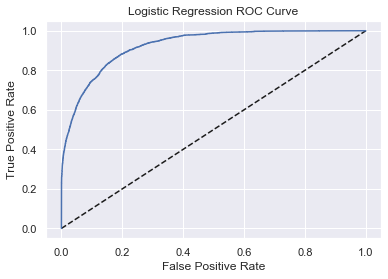

In [109]:
# Plotting the ROC curve
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [110]:
print(f'AUC score on the test set is : {roc_auc_score(y_test_data, y_pred_prob)}')

AUC score on the test set is : 0.9252764296337838


### Feature importance xgboost

In [137]:
y = train_data.salary
X = train_data.drop('salary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [138]:
xgb_final = XGBClassifier(learning_rate=0.007488004043342602,
                               gamma=0.0075659608090417945,
                               n_estimators=2892,
                               max_depth=6,
                               subsample=0.983151906882727,
                               colsample_bytree=0.5181433325086907,
                               reg_alpha=0.6970874066822441,
                                reg_lambda=2.4816443442269236,
                               n_jobs=-1,
                               random_state=42)

xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5181433325086907,
              gamma=0.0075659608090417945, learning_rate=0.007488004043342602,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              n_estimators=2892, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=42,
              reg_alpha=0.6970874066822441, reg_lambda=2.4816443442269236,
              scale_pos_weight=1, seed=None, silent=None,
              subsample=0.983151906882727, verbosity=1)

In [139]:
xgb_final.score(X_test, y_test)

0.87820118828109

In [143]:
feature_importance = xgb_final.feature_importances_

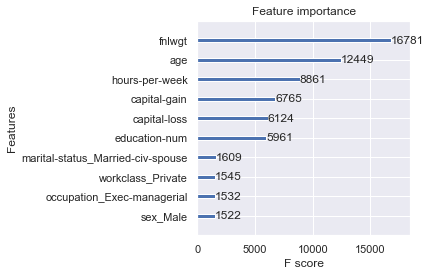

In [149]:
plot_importance(xgb_final, max_num_features=10)
plt.tight_layout()
#plt.show()
plt.savefig('xgb.svg')

# Keras results

In [91]:
resulat_keras = pd.read_csv('Poster/Modèle_keras/KerasResultat.csv')

In [92]:
resulat_keras.drop('Unnamed: 0', axis=1, inplace=True)

In [93]:
resulat_keras.index += 1

In [100]:
resulat_keras.sort_values(by='Accuracy', ascending=True).head(10)

,dim_learning_rate,dim_num_dense_layers,dim_num_input_nodes,dim_num_dense_nodes,dim_activation,dim_batch_size,Accuracy
123,0.027750,4,11,14,sigmoid,338,-0.857201
21,0.054281,7,50,47,relu,154,-0.856689
76,0.024853,1,50,46,sigmoid,284,-0.856279
57,0.044731,4,8,25,relu,60,-0.855870
112,0.031639,1,15,4,sigmoid,194,-0.855562
9,0.017345,6,10,38,sigmoid,105,-0.855562
62,0.026795,1,14,36,relu,88,-0.855460
78,0.004705,1,8,34,relu,24,-0.855460
178,0.050557,4,50,18,sigmoid,315,-0.855050
182,0.072742,1,47,50,sigmoid,375,-0.855050


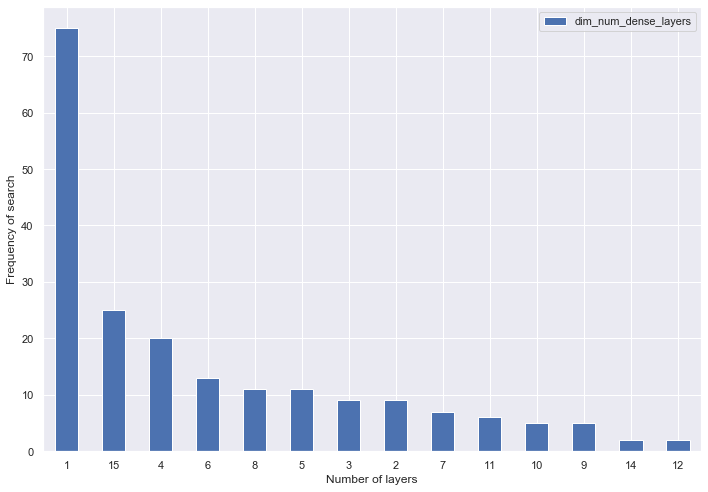

In [90]:
plt.figure(figsize=(10,7))
resulat_keras.dim_num_dense_layers.value_counts().plot(kind='bar')
plt.legend()
plt.xticks(rotation=0)
plt.xlabel('Number of layers')
plt.ylabel('Frequency of search')
plt.tight_layout()
#plt.show()
plt.savefig('keras_num_dense_layers.svg')

In [164]:
df1 = resulat_keras[resulat_keras['dim_num_dense_layers'] == 4].sort_values(by='Accuracy').head(1)

In [165]:
df2 = resulat_keras[resulat_keras['dim_num_dense_layers'] == 4].sort_values(by='Accuracy').tail(1)

In [166]:
df3 = resulat_keras[resulat_keras['dim_num_dense_layers'] == 1].sort_values(by='Accuracy').head(1)

In [167]:
df4 = resulat_keras[resulat_keras['dim_num_dense_layers'] == 1].sort_values(by='Accuracy').tail(1)

In [168]:
df5 = pd.concat([df1, df2, df3, df4])

In [169]:
display(df5)

,dim_learning_rate,dim_num_dense_layers,dim_num_input_nodes,dim_num_dense_nodes,dim_activation,dim_batch_size,Accuracy
123,0.027750,4,11,14,sigmoid,338,-0.857201
71,0.000010,4,21,2,sigmoid,171,-0.246159
76,0.024853,1,50,46,sigmoid,284,-0.856279
54,0.000010,1,1,50,relu,500,-0.449191


In [133]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

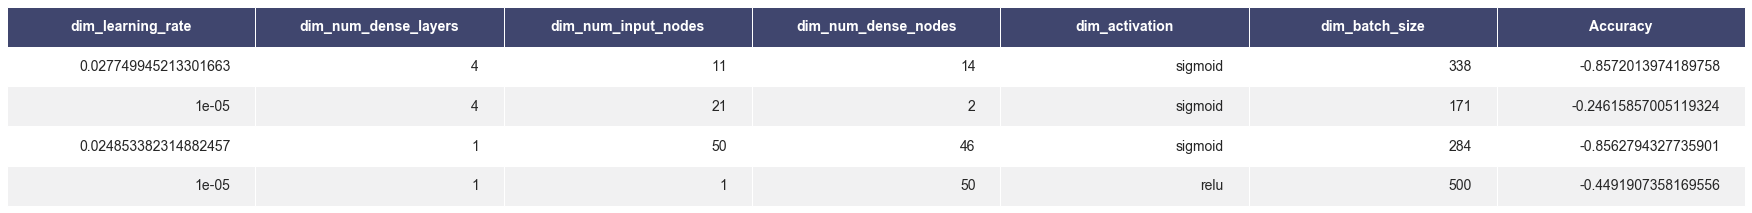

In [175]:
render_mpl_table(df5, header_columns=0, col_width=3.5)
plt.tight_layout()
#plt.show()
plt.savefig('keras_results.svg')

# Xgboost results

In [4]:
resulat_xgboost = pd.read_csv('Poster/Modèle_xgboost/XGBoost_result.csv')

In [5]:
resulat_xgboost.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
resulat_xgboost.index += 1

In [8]:
resulat_xgboost.sort_values(by='Accuracy').head(10)

,learning_rate,gamma,n_estimators,max_depth,subsample,colsample_bytree,reg_alpha,reg_lambda,Accuracy
43,0.007488,0.007566,2892,6,0.983152,0.518143,0.697087,2.481644,-0.878918
294,0.224410,0.001022,76,6,0.995031,0.568342,2.562134,0.316635,-0.878099
46,0.007894,0.005196,2982,5,0.989002,0.805886,0.478077,0.723335,-0.877382
1,0.230000,0.006800,95,6,0.990000,0.500000,0.960000,1.500000,-0.877279
210,0.004365,0.005102,2930,8,0.945710,0.523217,0.104906,2.828454,-0.877177
167,0.066954,0.001227,1880,3,0.966432,0.540283,0.021100,2.784058,-0.877177
213,0.227158,0.000403,600,3,0.993537,0.512417,0.479521,2.822547,-0.877177
155,0.070609,0.008546,1894,3,0.972587,0.555409,0.173017,2.672120,-0.876972
102,0.361881,0.007600,54,5,0.997566,0.996628,1.382815,1.819397,-0.876869
235,0.120666,0.000182,800,3,0.988215,0.580513,0.550181,2.607296,-0.876767


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 720x504 with 0 Axes>

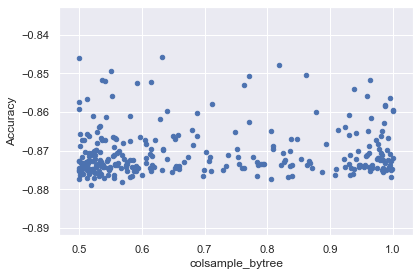

In [155]:
plt.figure(figsize=(10,7))
resulat_xgboost.plot(x='colsample_bytree', y='Accuracy', kind='scatter')
plt.tight_layout()
#plt.show()
plt.savefig('xgboost_col_sample.svg')

In [466]:
resulat_xgboost.columns

Index(['learning_rate', 'gamma', 'n_estimators', 'max_depth', 'subsample',
       'colsample_bytree', 'reg_alpha', 'reg_lambda', 'Accuracy'],
      dtype='object')